In [1]:
# import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.io.json import json_normalize
import time
import warnings
warnings.filterwarnings(action='ignore')
from IPython.display import Image

<b><span style="color:white; background-color:red; font-size:150%">마크다운</span></b>

<b><span style="color:black; background-color:yellow; font-size:200%">게임 Battle Ground의 pc, 모바일, steam 별  
    인기순위를 분석하는 모형</span></b>


# BATTLEGROUNDS 란?

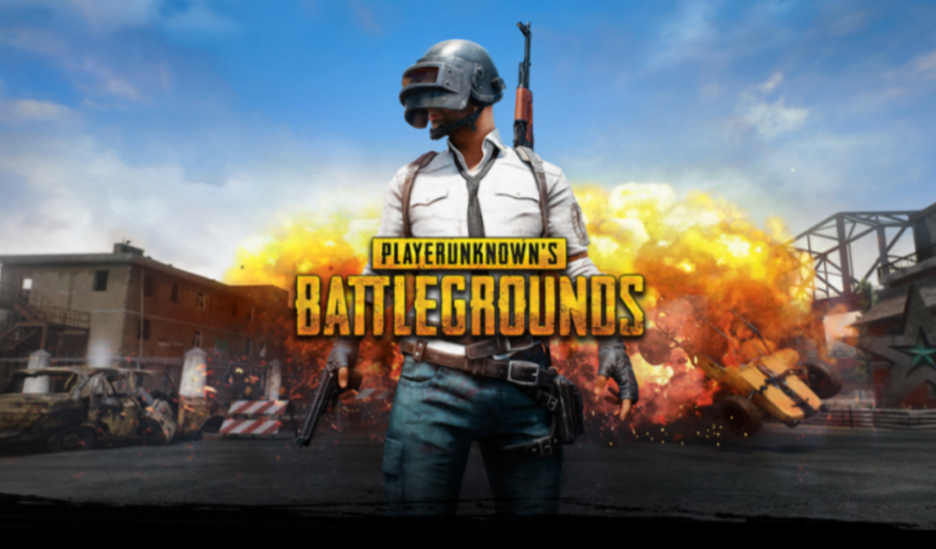

## BATTLEGROUNDS 기본 지식
인기  
장르  
유통사

## 분석 동기 및 이유

In [102]:
pc14 = pd.read_csv('C:/Users/HAIM/Documents/dev/gameData/the_log_data_manufac_csv/the_log_gamename_top.csv')
pc14.head(14)

,name,name.1
0,서든어택,286
1,아이온,286
2,메이플스토리,286
3,배틀그라운드,286
4,던전앤파이터,286
5,사이퍼즈,286
6,스타크래프트 리마스터,286
7,리니지,286
8,스타크래프트2,286
9,오버워치,286


__pc방 점유율에서 변하지 않는 14개 게임을 분석하던 중, 가장 변동률이 큰 배틀 그라운드가 눈에 띄었다.__

BATTLEGROUNDS는 우리가 찾을 수 있는 pc, 모바일, 스팀 데이터 플랫폼에 모두 있는 게임이기 때문에 **상관관계**를 분석하기에 좋은 모델이라고 판단했다.  
그리고 팀원 중 BATTLEGROUNDS 게임 유저가 있었기 때문에 관련 배경지식을 쉽게 이해할 수 있었다.

# BATTLEGROUNDS data 수집 - DF 보여주기

data 수집방법 - 크롤링  
사유: 정리되어져 있는 파일이 없었기 때문에, 특정 사이트들에서 가져올 수 밖에 없었음

크롤링을 통해서만 데이터를 수집하기로 결정.  
훗날 후회하는 계기가 됨...

*크롤링 으로 csv 파일로 저장함  
크롤링방법  
1. Instant Data Scraper  
2. 셀레니움, 파이썬

##  y축
국민트리 : https://trees.gamemeca.com/
- 사이트 소개 : 
- 기준 선정 이유 : pc, 모바일, 스팀의 인기순위가 모두 있기 때문에 선정함
- 신용/신뢰 : 

국민트리_df.tail()_예시
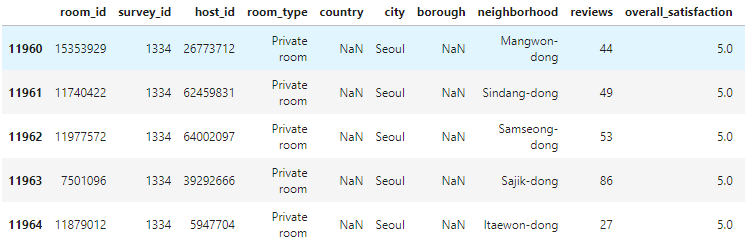

In [104]:
dfpop_p[['rank','name','company','type']].tail(5)

,rank,name,company,type
3715,16,마비노기,㈜넥슨코리아,MMORPG
3716,17,테일즈런너,㈜스마일게이트메가포트,레이싱
3717,18,오버워치,블리자드 엔터테인먼트,팀 기반 슈팅
3718,19,바람의나라,㈜넥슨코리아,MMORPG
3719,20,리니지,㈜엔씨소프트,MMORPG


## x축

### pc방 인기순위, 점유율 (가입하면 무료)
the log : https://www.thelog.co.kr/index.do
- 사이트 소개 : 
- 신용/신뢰 : 네이버에서 게임순위를 검색했을 때 출처가 되는 사이트이기 때문에 신뢰도 확보

In [108]:
# pc방_df.tail
dfpc[['rank','name','genre','distributor']].tail(5) 

,rank,name,genre,distributor
8575,26,검은사막,RPG,(주)펄어비스
8576,27,블레이드 & 소울,RPG,엔씨소프트
8577,28,크레이지아케이드,아케이드,넥슨
8578,29,엘소드,RPG,넥슨
8579,30,카운터-스트라이크 온라인,FPS,넥슨


In [8]:
# pc방 점유율_df_항목

rank : pc방 점유율 순위
name : 게임명
genre : 장르
distributor : 유통사

### 모바일 인기순위, 수익, 유저 (일정기간까지 무료로 볼 수 있음)
mobileindex : https://www.mobileindex.com/mi-chart/weekly-rank/revenue #수익
              https://www.mobileindex.com/mi-chart/weekly-rank/user #유저
- 사이트 소개 : 
- 신용/신뢰? 구글, 삼성전자, 네이버, 쿠팡 등 대기업이 금액을 지불하여 data를 가져온 것으로 보아 신뢰도 확보

In [109]:
# 모바일_df.tail()
dfr[['rank','app_name']].tail(5)

,rank,app_name
4015,26,한게임 포커
4016,27,뮤오리진3
4017,28,세븐나이츠 레볼루션
4018,29,제2의 나라: Cross Worlds
4019,30,R2M


In [20]:
# 모바일_df_항목

rank : 모바일 수익 순위
app_name : 게임 이름

### 아프리카 인기순위, 방송 점유율 (일정기간까지 무료로 볼 수 있음)
아프리카 : https://gameranking.afreecatv.com/
- 사이트 소개 : 
- 신용/신뢰? 

In [110]:
# 아프리카_df.tail()
dfa[['broad_rank','name','broad_share']].tail(5)

,broad_rank,name,broad_share
4285,26,테일즈런너,0.2%
4286,27,던파,0.2%
4287,28,R2,0.1%
4288,29,오버워치,0.1%
4289,30,거상,0.1%


In [23]:
# 아프리카_df_항목
broad_rank : 방송 점유 순위
name : 게임명
broad_share : 방송 점유율 

In [24]:
# 아프리카_df_사용 가능한 데이터

# 데이터 전처리

크롤링한 데이터의 경우에는 데이터 전처리가 필요

'항목'에 따른 데이터 처리_예시
- 항목 : week_num ... 


In [ ]:
dfr['week_num'] = 133 - dfr.index // 30

__2022년 7월 마지막주를 0으로 하여 역방향으로 숫자를 부여하였다.__

# BATTLEGROUNDS 데이터 분석

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.io.json import json_normalize
import time
import warnings
warnings.filterwarnings(action='ignore')
from IPython.display import Image

## BATTLEGROUNDS  DataFrame 가져오기 -> GRAPH 보여줌=시각화

In [4]:
#github에 모두 push 한 후 가져오기

# 기준data
#game popularity ranking
dfpop_p = pd.read_csv('C:/Users/HAIM/Documents/debbu/gameData/game_tree_graph/pretty_pc_graph.csv',encoding = 'utf-8') #pc 인기순위
dfpop_m = pd.read_csv('C:/Users/HAIM/Documents/debbu/gameData/game_tree_graph/pretty_mobile_graph.csv',encoding = 'utf-8') #모바일 인기순위
dfpop_s = pd.read_csv('C:/Users/HAIM/Documents/debbu/gameData/game_tree_graph/pretty_steam_graph.csv',encoding = 'utf-8') #스팀 인기순위
                                              # 스팀
                                              # - 비교변수를 찾지 못함 
                                              # - 하지만 BATTLEGROUNDS 게임이 'steam' 에도 있기 때문에 종속변수들 사이에서도 영향이 있을 것으로 추정되어 데이터를 가져오게 되었음


# 변수data
#pc_room 
dfpc = pd.read_csv("C:/Users/HAIM/Documents/debbu/gameData/the_log_data_manufac_csv/the_log_weeknum.csv",encoding='utf-8')

#모바일
dfr = pd.read_csv('C:/Users/HAIM/Documents/debbu/gameData/mobile_revenue/mobile_revenue_rank_30.csv',encoding='utf-8') #모바일 수익
dfu = pd.read_csv('C:/Users/HAIM/Documents/debbu/gameData/mobile_user/mobile_user_rank_30.csv',encoding='utf-8') #모바일 유저

#아프리카tv: 인터넷방송 (pc, 모바일 같이 있는 data, 하지만 거의 pc가 점유율이 높음)
dfa = pd.read_csv('C:/Users/HAIM/Documents/debbu/gameData/ffinalafreecatv.csv') 

In [5]:
dfr['week_num'] = 133 - dfr.index // 30
dfu['week_num'] = 133 - dfu.index // 30

## DataFrame  
1.비교,  
2.모형(회귀, 잔차의 분포, 다중공선성,..),  
3.y=fx(할수있다면..ㅋ)
- 각 데이터를 합쳐서 사용하지 않고 각 플랫폼(pc,모바일,steam)으로 나누어 비교함
- 기준 vs 기준
- 기준 vs 변수
- 변수 vs 변수

In [6]:
dfa_bg = dfa.loc[dfa['name'] == '배틀그라운드']
dfu_bg = dfu.loc[dfu['app_name'] == '배틀그라운드']
dfr_bg = dfr.loc[dfr['app_name'] == '배틀그라운드']
dfpop_m_bg = dfpop_m.loc[dfpop_m['name'] == '배틀그라운드 모바일']
dfpop_p_bg = dfpop_p.loc[dfpop_p['name'] == '배틀그라운드']
dfpop_s_bg = dfpop_s.loc[dfpop_s['name'] == '플레이어언노운스 배틀그라운드']
dfpc_bg = dfpc.loc[dfpc['name'] == '배틀그라운드']

### 기준 vs 기준

#### pc 인기순위 vs 스팀 인기순위 vs 모바일 인기순위

In [13]:
len(dfpop_p_bg['week_num'])

186

In [14]:
len(dfpop_s_bg['week_num'])

123

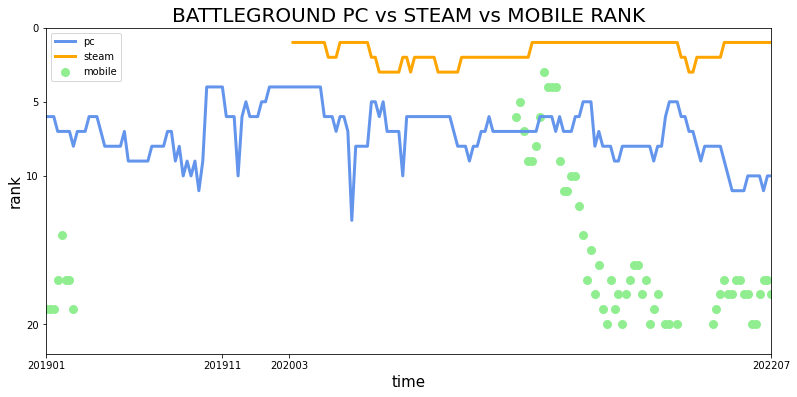

In [88]:
fig = plt.figure(figsize=(13,6))
ax = fig.add_subplot(1, 1, 1)
plt.plot(dfpop_p_bg['week_num'],dfpop_p_bg['rank'], label='pc',color='cornflowerblue',linewidth=3)
plt.plot(dfpop_s_bg['week_num'],dfpop_s_bg['rank'], label='steam',color='orange',linewidth=3)
plt.scatter(dfpop_m_bg['week_num'],dfpop_m_bg['rank'], color = 'lightgreen', label='mobile',linewidth=3)
# sns.swarmplot(data=dfpop_m_bg, x="week_num", y="rank")
plt.title('BATTLEGROUND PC vs STEAM vs MOBILE RANK',size=20)
plt.ylim(22,0)
plt.xlim(185,0)
plt.xlabel('time', size=15)
plt.ylabel('rank', size=15)
plt.legend(loc='best')
ax.set_xticks([185,140,123,0],[201901,201911,202003,202207])
ax.set_yticks([20,10,5,0])
plt.show()

### 기준 vs 변수

<b><span style="color:black; background-color:aliceblue; font-size:120%">기준 : pc 인기순위</span></b>

#### pc 인기순위 vs pc 방

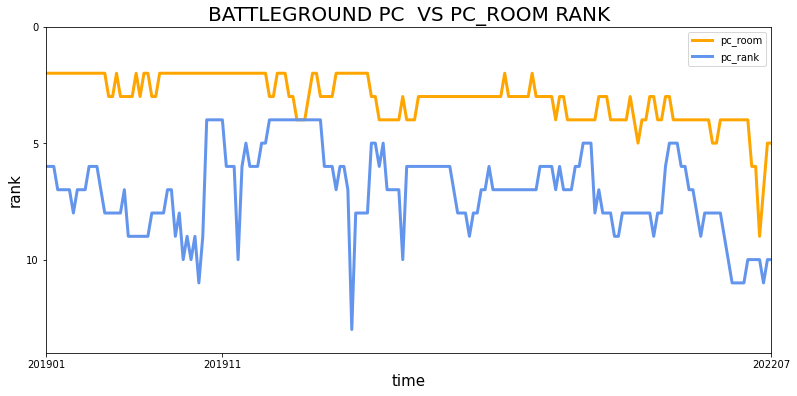

In [98]:
fig = plt.figure(figsize=(13,6))
ax = fig.add_subplot(1, 1, 1)
plt.plot(dfpc_bg['week_num'],dfpc_bg['rank'],label = 'pc_room',color='orange',linewidth=3)
plt.plot(dfpop_p_bg['week_num'],dfpop_p_bg['rank'], label = 'pc_rank',color='cornflowerblue',linewidth=3)
plt.title('BATTLEGROUND PC  VS PC_ROOM RANK',size=20)
plt.ylim(14,0)
plt.xlim(185,0)
plt.xlabel('time', size=15)
plt.ylabel('rank', size=15)
plt.legend(loc='best')
ax.set_xticks([185,140,0],[201901,201911,202207])
ax.set_yticks([10,5,0])
plt.show()

#### pc 인기순위 vs 모바일 수익

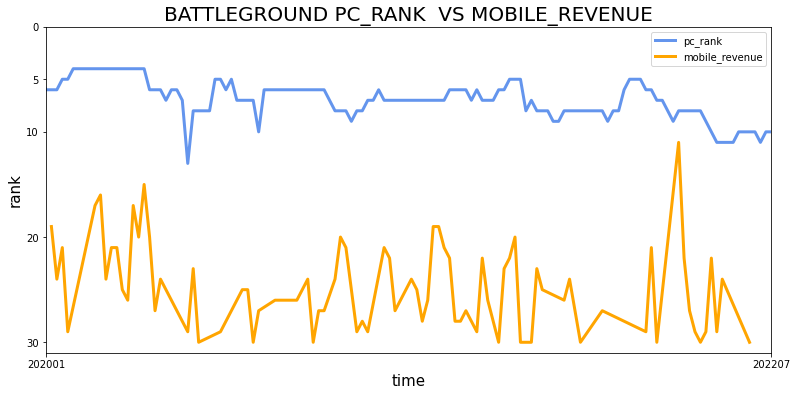

In [106]:
fig = plt.figure(figsize=(13,6))
ax = fig.add_subplot(1, 1, 1)
plt.plot(dfpop_p_bg['week_num'],dfpop_p_bg['rank'], label = 'pc_rank',color='cornflowerblue',linewidth=3)
plt.plot(dfr_bg['week_num'],dfr_bg['rank'], label = 'mobile_revenue',color='orange',linewidth=3)
plt.title('BATTLEGROUND PC_RANK  VS MOBILE_REVENUE',size=20)
plt.ylim(31,0)
plt.xlim(133,0)
plt.xlabel('time', size=15)
plt.ylabel('rank', size=15)
plt.legend()
ax.set_xticks([133,0],[202001,202207])
ax.set_yticks([30,20,10,5,0])
plt.show()

#### pc 인기순위 vs 모바일 유저

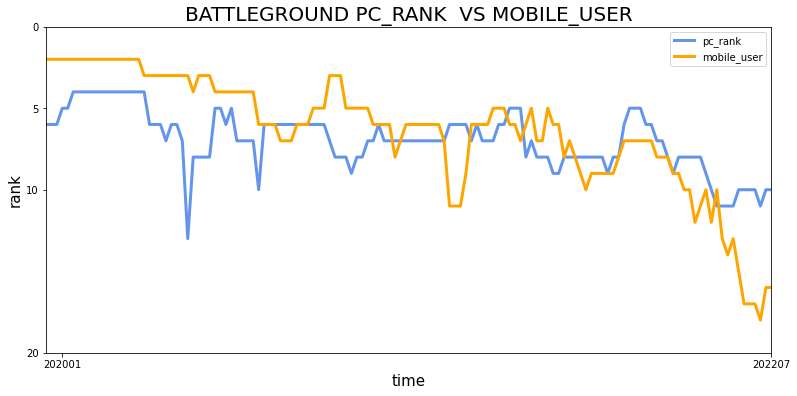

In [126]:
fig = plt.figure(figsize=(13,6))
ax = fig.add_subplot(1, 1, 1)
plt.plot(dfpop_p_bg['week_num'],dfpop_p_bg['rank'], label = 'pc_rank',color='cornflowerblue',linewidth=3)
plt.plot(dfu_bg['week_num'],dfu_bg['rank'], label = 'mobile_user',color='orange',linewidth=3)
plt.title('BATTLEGROUND PC_RANK  VS MOBILE_USER',size=20)
plt.ylim(20,0)
plt.xlim(133,0)
plt.xlabel('time', size=15)
plt.ylabel('rank', size=15)
plt.legend()
ax.set_xticks([130,0],[202001,202207])
ax.set_yticks([20,10,5,0])
plt.show()

#### pc 인기순위 vs 아프리카tv

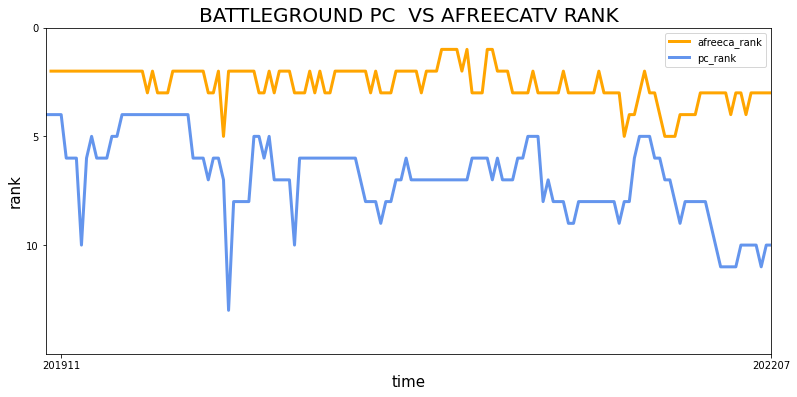

In [127]:
fig = plt.figure(figsize=(13,6))
ax = fig.add_subplot(1, 1, 1)
plt.plot(dfa_bg['week_num'],dfa_bg['broad_rank'],label = 'afreeca_rank',color='orange',linewidth=3)
plt.plot(dfpop_p_bg['week_num'],dfpop_p_bg['rank'],label = 'pc_rank',color='cornflowerblue',linewidth=3)
plt.title('BATTLEGROUND PC  VS AFREECATV RANK',size=20)
plt.ylim(15,0)
plt.xlim(143,0)
plt.xlabel('time', size=15)
plt.ylabel('rank', size=15)
plt.legend(loc='best')
ax.set_xticks([140,0],[201911,202207])
ax.set_yticks([10,5,0])
plt.show()

<b><span style="color:black; background-color:aliceblue; font-size:120%">기준 : 모바일 인기순위</span></b>

#### 모바일 인기순위 vs pc 방

#### 모바일 인기순위 vs 모바일 수익

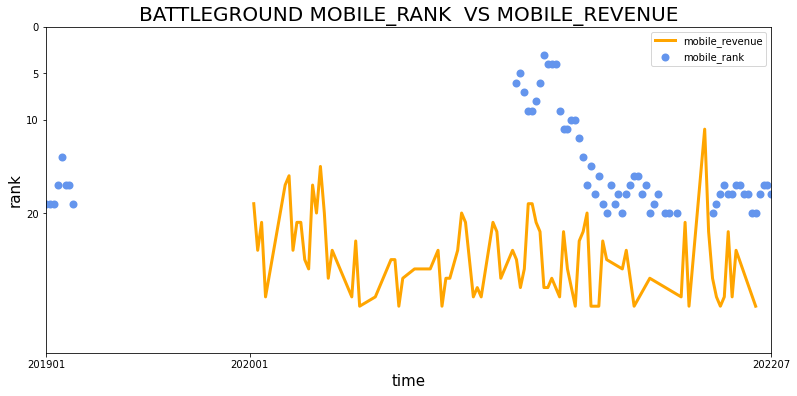

In [155]:
fig = plt.figure(figsize=(13,6))
ax = fig.add_subplot(1, 1, 1)
plt.plot(dfr_bg['week_num'],dfr_bg['rank'], label = 'mobile_revenue',color='orange',linewidth=3)
plt.scatter(dfpop_m_bg['week_num'],dfpop_m_bg['rank'], label = 'mobile_rank',color='cornflowerblue',linewidth=2)
plt.title('BATTLEGROUND MOBILE_RANK  VS MOBILE_REVENUE',size=20)
plt.ylim(35,0)
plt.xlim(185,0)
plt.xlabel('time', size=15)
plt.ylabel('rank', size=15)
plt.legend(loc='best')
ax.set_xticks([185,133,0],[201901,202001,202207])
ax.set_yticks([20,10,5,0])
plt.show()

#### 모바일 인기순위 vs 모바일 유저

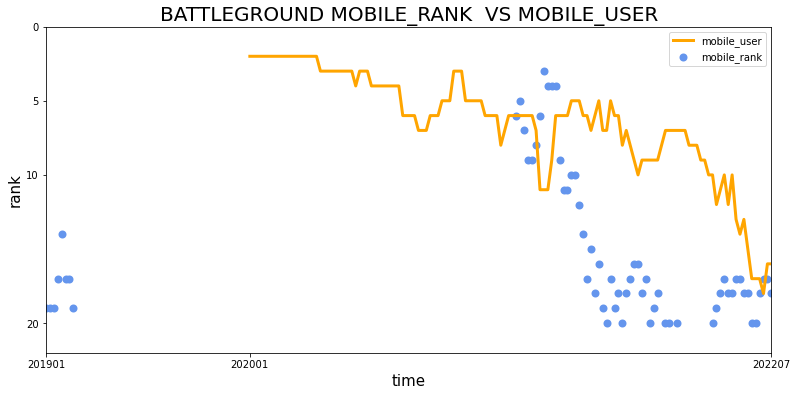

In [156]:
fig = plt.figure(figsize=(13,6))
ax = fig.add_subplot(1, 1, 1)
plt.plot(dfu_bg['week_num'],dfu_bg['rank'], label = 'mobile_user',color='orange',linewidth=3)
plt.scatter(dfpop_m_bg['week_num'],dfpop_m_bg['rank'], label = 'mobile_rank',color='cornflowerblue',linewidth=2)
plt.title('BATTLEGROUND MOBILE_RANK  VS MOBILE_USER',size=20)
plt.ylim(22,0)
plt.xlim(185,0)
plt.xlabel('time', size=15)
plt.ylabel('rank', size=15)
plt.legend(loc='best')
ax.set_xticks([185,133,0],[201901,202001,202207])
ax.set_yticks([20,10,5,0])
plt.show()

#### 모바일 인기순위 vs 아프리카tv

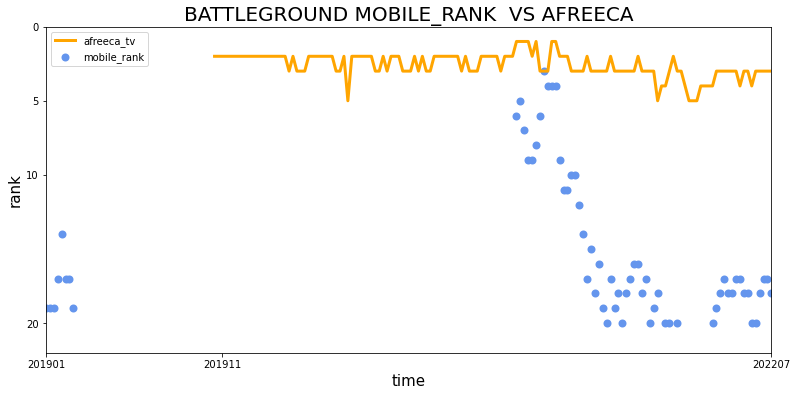

In [157]:
fig = plt.figure(figsize=(13,6))
ax = fig.add_subplot(1, 1, 1)
plt.plot(dfa_bg['week_num'],dfa_bg['broad_rank'], label = 'afreeca_tv',color='orange',linewidth=3)
plt.scatter(dfpop_m_bg['week_num'],dfpop_m_bg['rank'], label = 'mobile_rank',color='cornflowerblue',linewidth=2)
plt.title('BATTLEGROUND MOBILE_RANK  VS AFREECA',size=20)
plt.ylim(22,0)
plt.xlim(185,0)
plt.xlabel('time', size=15)
plt.ylabel('rank', size=15)
plt.legend(loc='best')
ax.set_xticks([185,140,0],[201901,201911,202207])
ax.set_yticks([20,10,5,0])
plt.show()

<b><span style="color:black; background-color:aliceblue; font-size:120%">기준 : 스팀 인기순위</span></b>

#### 스팀 인기순위 vs pc 방

fig = plt.figure(figsize=(13,6))
ax = fig.add_subplot(1, 1, 1)
plt.plot(dfpc_bg['week_num'],dfpc_bg['rank'], label = 'pc_room',color='cornflowerblue',linewidth=3)
plt.plot(dfpop_s_bg['week_num'],dfpop_s_bg['rank'], label = 'steam_rank',color='orange',linewidth=3)
plt.title('BATTLEGROUND PC_ROOM  VS STEAM RANK',size=20)
plt.ylim(10,0)
plt.xlim(125,0)
plt.xlabel('time', size=15)
plt.ylabel('rank', size=15)
plt.legend(loc='best')
ax.set_xticks([125,0],[202003,202207])
ax.set_yticks([10,5,0])
plt.show()

#### 스팀 인기순위 vs 모바일 수익

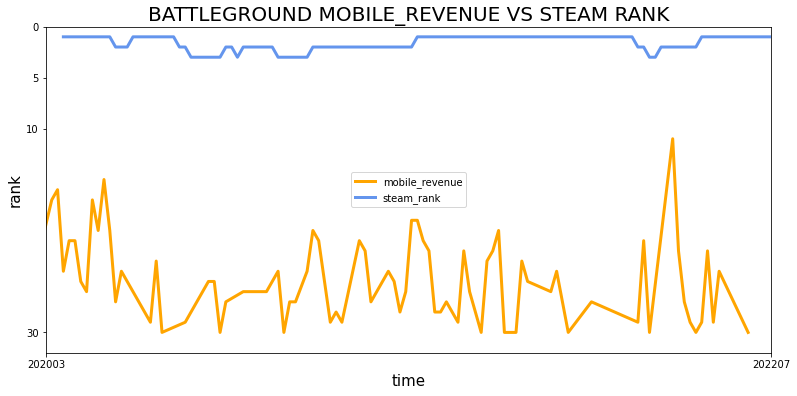

In [160]:
fig = plt.figure(figsize=(13,6))
ax = fig.add_subplot(1, 1, 1)
plt.plot(dfr_bg['week_num'],dfr_bg['rank'], label = 'mobile_revenue',color='orange',linewidth=3)
plt.plot(dfpop_s_bg['week_num'],dfpop_s_bg['rank'], label = 'steam_rank',color='cornflowerblue',linewidth=3)
plt.title('BATTLEGROUND MOBILE_REVENUE VS STEAM RANK',size=20)
plt.ylim(32,0)
plt.xlim(125,0)
plt.xlabel('time', size=15)
plt.ylabel('rank', size=15)
plt.legend(loc='best')
ax.set_xticks([125,0],[202003,202207])
ax.set_yticks([30,10,5,0])
plt.show()

#### 스팀 인기순위 vs 모바일 유저

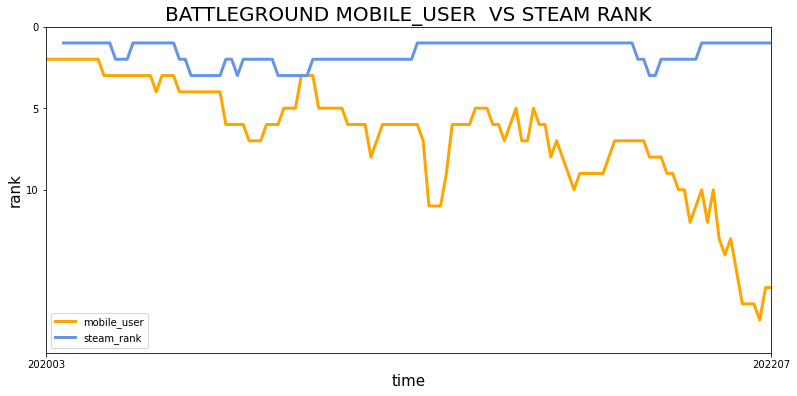

In [161]:
fig = plt.figure(figsize=(13,6))
ax = fig.add_subplot(1, 1, 1)
plt.plot(dfu_bg['week_num'],dfu_bg['rank'], label = 'mobile_user',color='orange',linewidth=3)
plt.plot(dfpop_s_bg['week_num'],dfpop_s_bg['rank'], label = 'steam_rank',color='cornflowerblue',linewidth=3)
plt.ylim(20,0)
plt.xlim(125,0)
plt.xlabel('time', size=15)
plt.ylabel('rank', size=15)
plt.legend(loc='best')
ax.set_xticks([125,0],[202003,202207])
ax.set_yticks([10,5,0])
plt.title('BATTLEGROUND MOBILE_USER  VS STEAM RANK',size=20)
plt.show()

#### 스팀 인기순위 vs 아프리카tv

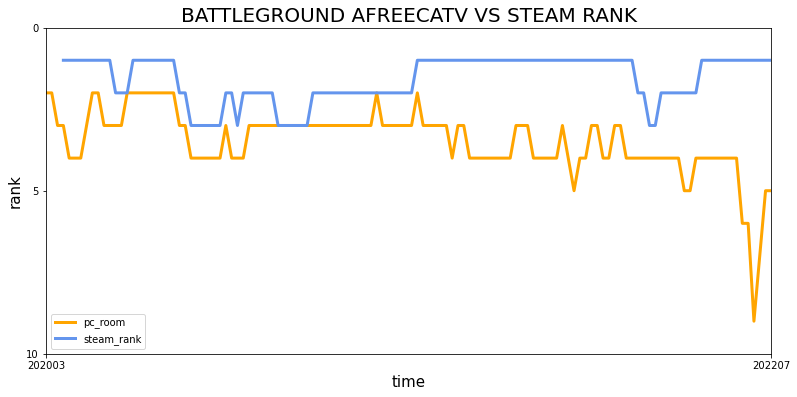

In [146]:
fig = plt.figure(figsize=(13,6))
ax = fig.add_subplot(1, 1, 1)
plt.plot(dfpc_bg['week_num'],dfpc_bg['rank'], label = 'pc_room',color='orange',linewidth=3)
plt.plot(dfpop_s_bg['week_num'],dfpop_s_bg['rank'], label = 'steam_rank',color='cornflowerblue',linewidth=3)
plt.ylim(10,0)
plt.xlim(125,0)
plt.xlabel('time', size=15)
plt.ylabel('rank', size=15)
plt.legend(loc='best')
ax.set_xticks([125,0],[202003,202207])
ax.set_yticks([10,5,0])
plt.title('BATTLEGROUND AFREECATV VS STEAM RANK',size=20)
plt.show()

### 변수 vs 변수

#### pc 방 vs 모바일 수익

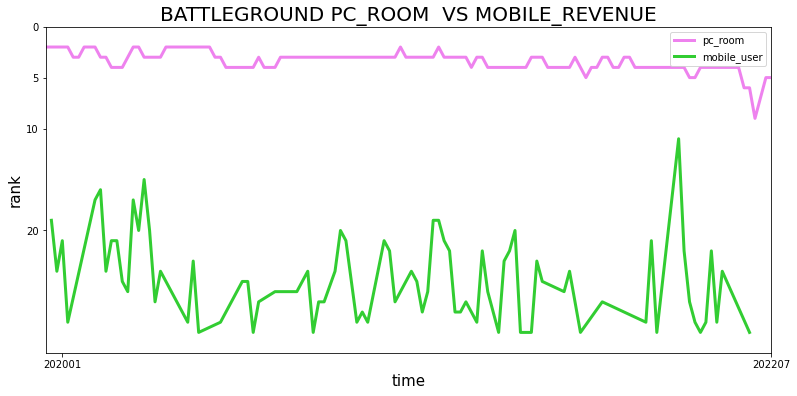

In [167]:
fig = plt.figure(figsize=(13,6))
ax = fig.add_subplot(1, 1, 1)
plt.plot(dfpc_bg['week_num'],dfpc_bg['rank'], label = 'pc_room',color='violet',linewidth=3)
plt.plot(dfr_bg['week_num'],dfr_bg['rank'], label = 'mobile_user',color='limegreen',linewidth=3)
plt.title('BATTLEGROUND PC_ROOM  VS MOBILE_REVENUE',size=20)
plt.ylim(32,0)
plt.xlim(133,0)
plt.xlabel('time', size=15)
plt.ylabel('rank', size=15)
plt.legend(loc='best')
ax.set_xticks([130,0],[202001,202207])
ax.set_yticks([20,10,5,0])
plt.show()

#### pc 방 vs 모바일 유저

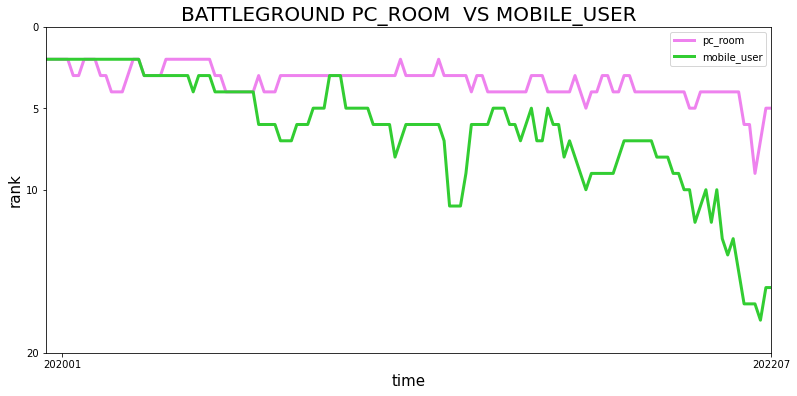

In [172]:
fig = plt.figure(figsize=(13,6))
ax = fig.add_subplot(1, 1, 1)
plt.plot(dfpc_bg['week_num'],dfpc_bg['rank'], label = 'pc_room',color='violet',linewidth=3)
plt.plot(dfu_bg['week_num'],dfu_bg['rank'], label = 'mobile_user',color='limegreen',linewidth=3)
plt.ylim(20,0)
plt.xlim(133,0)
plt.xlabel('time', size=15)
plt.ylabel('rank', size=15)
plt.legend(loc='best')
ax.set_xticks([130,0],[202001,202207])
ax.set_yticks([20,10,5,0])
plt.title('BATTLEGROUND PC_ROOM  VS MOBILE_USER',size=20)
plt.show()

#### pc 방 vs 아프리카tv

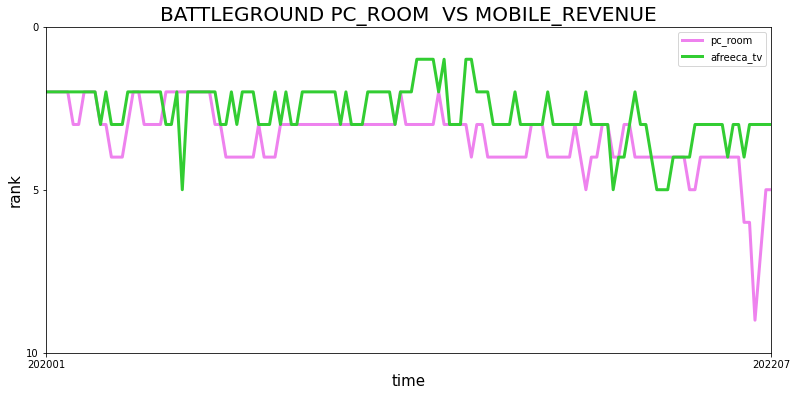

In [174]:
fig = plt.figure(figsize=(13,6))
ax = fig.add_subplot(1, 1, 1)
plt.plot(dfpc_bg['week_num'],dfpc_bg['rank'], label = 'pc_room',color='violet',linewidth=3)
plt.plot(dfa_bg['week_num'],dfa_bg['broad_rank'], label = 'afreeca_tv',color='limegreen',linewidth=3)
plt.title('BATTLEGROUND PC_ROOM  VS MOBILE_REVENUE',size=20)
plt.ylim(10,0)
plt.xlim(133,0)
plt.xlabel('time', size=15)
plt.ylabel('rank', size=15)
plt.legend(loc='best')
ax.set_xticks([133,0],[202001,202207])
ax.set_yticks([10,5,0])
plt.show()

#### 모바일 수익 vs 모바일 유저

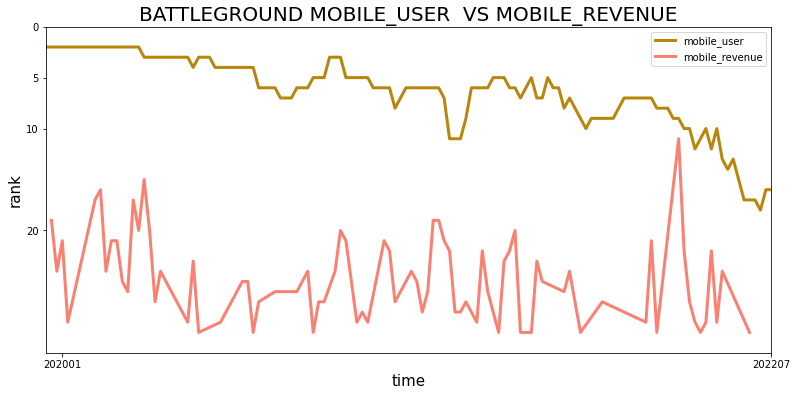

In [178]:
fig = plt.figure(figsize=(13,6))
ax = fig.add_subplot(1, 1, 1)
plt.plot(dfu_bg['week_num'],dfu_bg['rank'], label = 'mobile_user',color='darkgoldenrod',linewidth=3)
plt.plot(dfr_bg['week_num'],dfr_bg['rank'], label = 'mobile_revenue',color='salmon',linewidth=3)
plt.title('BATTLEGROUND MOBILE_USER  VS MOBILE_REVENUE',size=20)
plt.ylim(32,0)
plt.xlim(133,0)
plt.xlabel('time', size=15)
plt.ylabel('rank', size=15)
plt.legend(loc='best')
ax.set_xticks([130,0],[202001,202207])
ax.set_yticks([20,10,5,0])
plt.show()

#### 모바일 수익 vs 아프리카tv

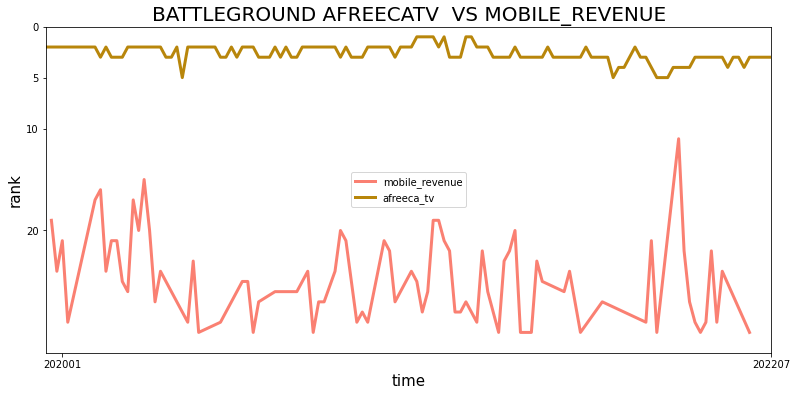

In [179]:
fig = plt.figure(figsize=(13,6))
ax = fig.add_subplot(1, 1, 1)
plt.plot(dfr_bg['week_num'],dfr_bg['rank'], label = 'mobile_revenue',color='salmon',linewidth=3)
plt.plot(dfa_bg['week_num'],dfa_bg['broad_rank'], label = 'afreeca_tv',color='darkgoldenrod',linewidth=3)
plt.title('BATTLEGROUND AFREECATV  VS MOBILE_REVENUE',size=20)
plt.ylim(32,0)
plt.xlim(133,0)
plt.xlabel('time', size=15)
plt.ylabel('rank', size=15)
plt.legend(loc='best')
ax.set_xticks([130,0],[202001,202207])
ax.set_yticks([20,10,5,0])
plt.show()

#### 모바일 유저 vs 아프리카tv

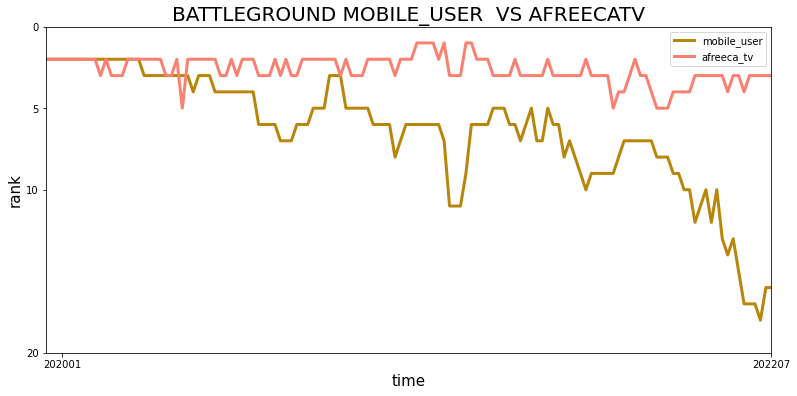

In [180]:
fig = plt.figure(figsize=(13,6))
ax = fig.add_subplot(1, 1, 1)
plt.plot(dfu_bg['week_num'],dfu_bg['rank'], label = 'mobile_user',color='darkgoldenrod',linewidth=3)
plt.plot(dfa_bg['week_num'],dfa_bg['broad_rank'], label = 'afreeca_tv',color='salmon',linewidth=3)
plt.title('BATTLEGROUND MOBILE_USER  VS AFREECATV',size=20)
plt.ylim(20,0)
plt.xlim(133,0)
plt.xlabel('time', size=15)
plt.ylabel('rank', size=15)
plt.legend(loc='best')
ax.set_xticks([130,0],[202001,202207])
ax.set_yticks([20,10,5,0])
plt.show()

# 모형 Test

## 상관관계 공식 구하기_예시
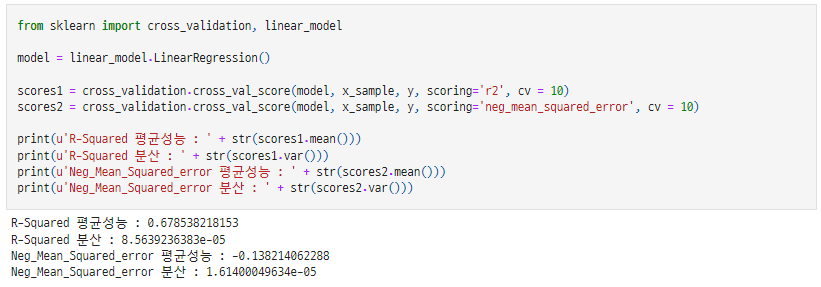

## 최종모형_예시
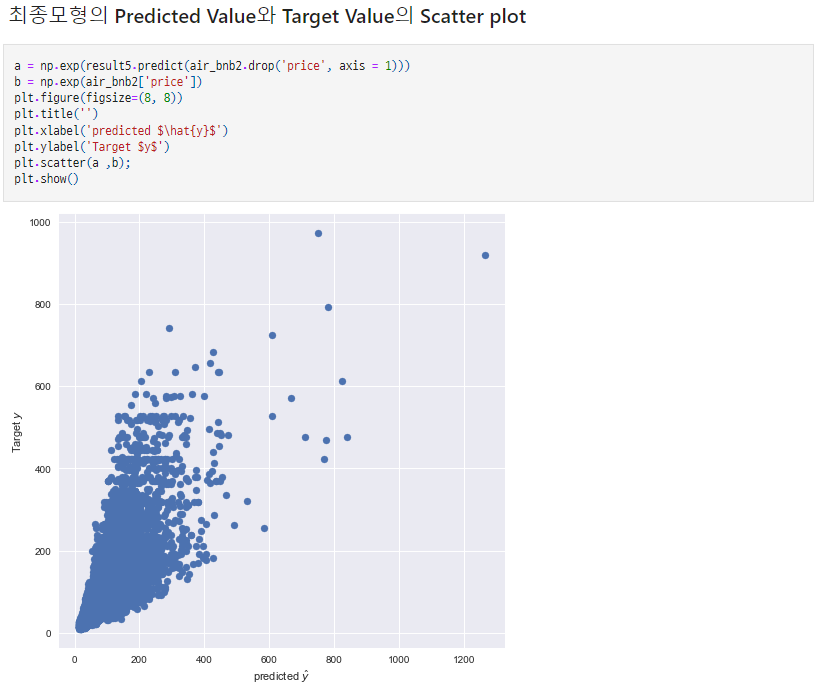

# 결론

## 결과_예시
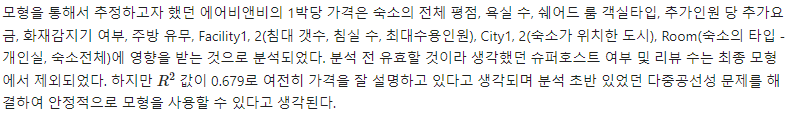

## 최종모형_예시
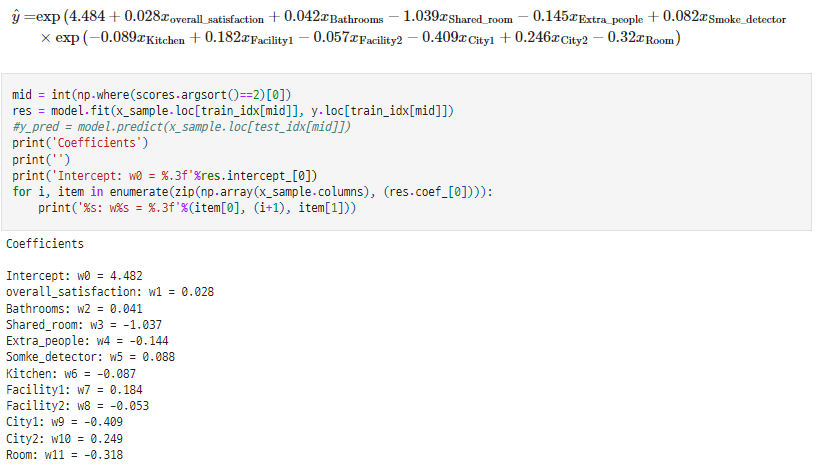

## 코멘트_예시
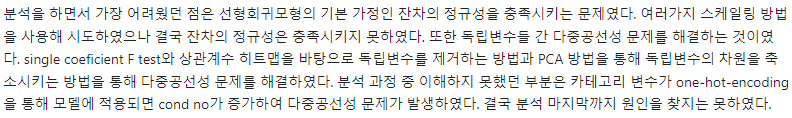